# Exploratory Data Analysis

<hr />

## Import libraries

In [47]:
import pandas as pd
import openpyxl
from matplotlib import pyplot as plt
import spacy
from kmodes.kprototypes import KPrototypes
import altair as alt
alt.renderers.enable('mimetype')

RendererRegistry.enable('mimetype')

<hr />



## Read in CSV train file to pandas

In [32]:
train_df = pd.read_csv(
    "../data/processed/train.csv",
)
train_df.head()

,api_endpoint_id,request_id,method,parameters,usage_base,sample_response,authentication,security_test_category,security_test_result,server_name,...,Sales & Marketing,Security & Technology,Skills & Career Development,Social Media & Technology,Software & Services,Sports & Entertainment,Transportation & Automobile,Work & Personal Life,eCommerce & Trade,"Food, Health & Medicine"
0,1632,4630,get,{},2,"{""meta"":{""requests"":8,""timestamp"":1551002777,""...",1,NaN,NaN,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,799,10260,get,"{""q"": ""china""}",2,"{""status"":""ok"",""totalResults"":90910,""articles""...",1,NaN,NaN,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,1785,4723,get,"{""query"": ""sony""}",2,"[""sony"",[""Sony Corporation (Org)"",""Sony Pictur...",1,NaN,NaN,1,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0
3,2084,10269,get,{},2,"[\n {\n ""id"": ""2baf70d1-42bb-4437-b551-e5f...",1,NaN,NaN,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,438,1403,get,"{""ad_account_Id"": ""2146104625714094""}",2,"{""data"":[]}",0,NaN,NaN,1,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0


In [33]:
train_df = train_df.drop(columns=["api_endpoint_id", "request_id", "sample_response", "parameters", "response_metadata", "Country"])
train_df

,method,usage_base,authentication,security_test_category,security_test_result,server_name,is_pii,is_fii,NRI score,AI & Data Science,...,Sales & Marketing,Security & Technology,Skills & Career Development,Social Media & Technology,Software & Services,Sports & Entertainment,Transportation & Automobile,Work & Personal Life,eCommerce & Trade,"Food, Health & Medicine"
0,get,2,1,NaN,NaN,1,True,False,NaN,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,get,2,1,NaN,NaN,1,True,False,76.479613,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,get,2,1,NaN,NaN,1,True,False,NaN,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0
3,get,2,1,NaN,NaN,1,True,False,81.089820,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,get,2,0,NaN,NaN,1,False,False,NaN,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1483,get,2,1,NaN,NaN,1,False,False,NaN,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1484,get,2,1,NaN,NaN,1,True,False,NaN,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1485,get,2,1,NaN,NaN,0,False,False,81.089820,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1486,get,2,1,NaN,NaN,1,False,False,81.089820,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


<hr />



## Encoding

In [39]:
train_df = train_df.dropna()

In [59]:
numerical_features = ["NRI score"]
categorical_features = train_df.drop(numerical_features, axis = 1).columns.values
categorical_idx =[train_df.columns.get_loc(c) for c in categorical_features if c in train_df]
categorical_idx

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33]

<hr />

## K-Modes

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 0, ncost: 129.51255133394562
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/100, moves: 0, ncost: 129.51255133394562
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 3, iteration: 1/100, moves: 0, ncost: 129.51255133394562
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 4, iteration: 1/100, moves: 0, ncost: 129.51255133394562
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 5, iteration: 1/100, moves: 0, ncost: 129.51255133394562
Best run was number 1
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 0, ncost: 44.72110751477193
Init: initializing centroids
Init: initializing clusters
Starting iter

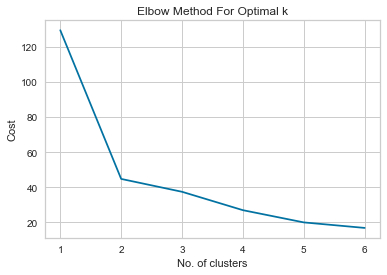

In [66]:
# Elbow curve to find optimal K
cost = []
K = range(1, 7)
for num_clusters in list(K):
    kproto = KPrototypes(n_clusters=num_clusters, init="random", n_init=5, verbose=1)
    kproto.fit_predict(train_df, categorical=categorical_idx)
    cost.append(kproto.cost_)

plt.plot(K, cost, "bx-")
plt.xlabel("No. of clusters")
plt.ylabel("Cost")
plt.title("Elbow Method For Optimal k")
plt.show()

> We can see a bend at K=4 in the above graph indicating 4 is the optimal number of clusters.

In [67]:
kproto = KPrototypes(n_clusters=2, init = "random", n_init = 5, verbose=1)
kproto.fit_predict(train_df, categorical=categorical_idx)
# Print the cluster centroids
pd.DataFrame(kproto.cluster_centroids_, columns=train_df.columns.values)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 0, ncost: 44.72110751477193
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/100, moves: 0, ncost: 44.72110751477193
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 3, iteration: 1/100, moves: 0, ncost: 44.72110751477193
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 4, iteration: 1/100, moves: 6, ncost: 44.72110751477193
Run: 4, iteration: 2/100, moves: 0, ncost: 44.72110751477193
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 5, iteration: 1/100, moves: 3, ncost: 116.89809283333315
Run: 5, iteration: 2/100, moves: 0, ncost: 116.89809283333315
Best run was number 1


,method,usage_base,authentication,security_test_category,security_test_result,server_name,is_pii,is_fii,NRI score,AI & Data Science,...,Sales & Marketing,Security & Technology,Skills & Career Development,Social Media & Technology,Software & Services,Sports & Entertainment,Transportation & Automobile,Work & Personal Life,eCommerce & Trade,"Food, Health & Medicine"
0,81.08982029696402,get,2,1,XML External Entities,0.0,1,True,False,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,76.10033986263177,get,2,1,Broken Authentication,0.0,0,False,False,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


<hr />

## MCA